### Data 620 - Project 1
#### Shamecca Marshall

### Introduction

For this project I will be doing the below:
- Identify and load a network dataset that has some categorical information available for each node.
- For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
- Compare your centrality measures across your categorical groups.

The data set consists of TV shows and movies available on Hulu as of 2006 from Kaggle https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows. With the data set, we can measure the degree of centrality of nodes, such as TV shows and movies. We can analyze how the data differs between movies and TV shows made in the United States and those made outside the United States.

Import libraries

In [ ]:
import networkx as nx
import pandas as pd
from numpy.random import seed
from scipy.stats import t, sem
from scipy import stats
from math import sqrt
from numpy import mean
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [78]:
df = pd.read_csv("https://raw.githubusercontent.com/Meccamarshall/Data620/main/Week4/hulu_titles.csv")

In [128]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


### Filtering the data

In [88]:
df_USA = df[df['country']== 'United States']
df_inter = df[df['country'] != 'United States']

In [90]:
df_USA.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,TV Show,The Bachelorette,NaN,NaN,United States,"October 20, 2021",2003,TV-14,3 Seasons,"Reality, Romance",ABC's romance reality show lets one lucky lady...
17,s18,TV Show,America's Book of Secrets,NaN,NaN,United States,"October 15, 2021",2012,TV-14,1 Season,"Documentaries, History",America's story can be told in many ways. Whil...
19,s20,TV Show,Beyond Scared Straight,NaN,NaN,United States,"October 15, 2021",2011,TV-14,6 Seasons,"Documentaries, Reality, Teen",Beyond Scared Straight profiles the new approa...
21,s22,TV Show,Hoarders,NaN,NaN,United States,"October 15, 2021",2009,TV-PG,7 Seasons,"Health & Wellness, Lifestyle & Culture, Reality",Each 60-minute episode of Hoarders is a fascin...
22,s23,TV Show,Little Women: Atlanta,NaN,NaN,United States,"October 15, 2021",2016,TV-14,2 Seasons,"Black Stories, Reality","In Little Women: Atlanta, the little ladies tu..."


In [92]:
df_inter.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


### Plotting Graphs

In [94]:
g_dom = nx.from_pandas_edgelist(df_USA, 'release_year', 'rating')

In [96]:
print('Edges and Nodes for USA')
print('Number of nodes:', g_dom.order())
print('Number of nodes:', g_dom.size())

Edges and Nodes for USA
Number of nodes: 137
Number of nodes: 340


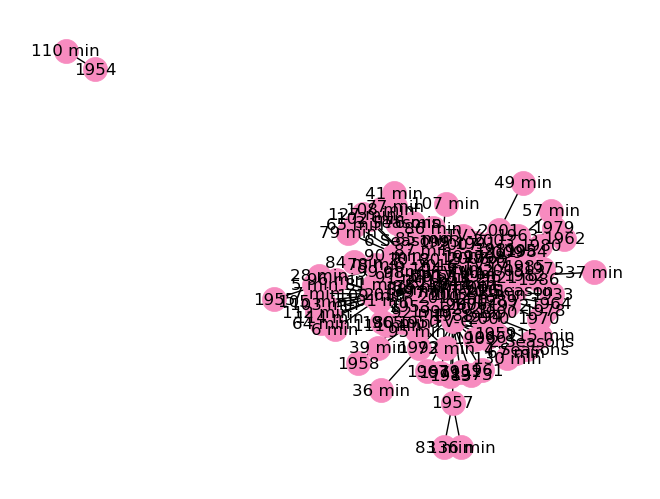

In [132]:
nx.draw(g_dom, node_color='#f78bbf', with_labels = True)

In [100]:
g_inter = nx.from_pandas_edgelist(df_inter, 'release_year', 'rating')

In [21]:
print('Edges and Nodes for International')
print('Number of nodes:', g_inter.order())
print('Number of nodes:', g_inter.size())

Edges and Nodes for International
Number of nodes: 131
Number of nodes: 407


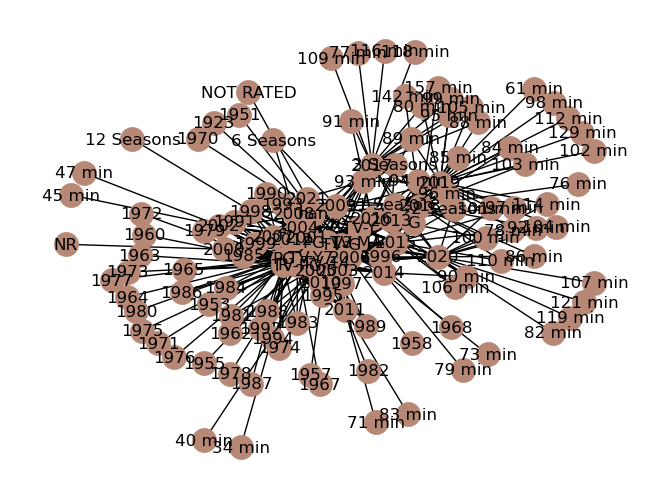

In [136]:
nx.draw(g_inter, node_color='#b78876', with_labels = True)

I compute the centrality measures for both data subsets and compare them. The R rating has the highest centrality scores in the national dataset, while TV-MA has the highest scores in the international dataset.

Grade: The grade in the international data set is higher than the national data set. 0.161084 vs. 0.5066173.
Eigenvector: The R classification value is very close to the TV-MA value, 0.2875 and 0.2813.
Between: The values for the international data set exceed the national data set. 0.161084 vs. 0.158999.
Proximity: The values of the international data set also exceed the national data set. or.585714 vs. 0.551020.

In [ ]:
USA

In [102]:
eig = nx.eigenvector_centrality(g_dom).values()
cent = nx.degree_centrality(g_dom).values()
between_cent = nx.betweenness_centrality(g_dom).values()
close_cent = nx.closeness_centrality(g_dom).values()

In [104]:
data_tuples = list(zip(eig,cent,between_cent,close_cent))
dom_table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
dom_table.index = list(g_dom)
dom_table.head()

,Eigenvector,Degree,Betweenness,Closeness
2003,0.051162,0.022059,0.000969,0.343827
TV-14,0.288361,0.250000,0.145700,0.487193
2012,0.144908,0.080882,0.017033,0.410029
2011,0.114126,0.044118,0.004572,0.395298
2009,0.093949,0.044118,0.016347,0.372964


INTERNATIONAL

In [108]:
eig = nx.eigenvector_centrality(g_inter).values()
cent = nx.degree_centrality(g_inter).values()
between_cent = nx.betweenness_centrality(g_inter).values()
close_cent = nx.closeness_centrality(g_inter).values()

In [110]:
data_tuples = list(zip(eig,cent,between_cent,close_cent))
inter_table = pd.DataFrame(data_tuples, columns=['Eigenvector','Degree','Betweenness','Closeness'])
inter_table.index = list(g_inter)
inter_table.head()

,Eigenvector,Degree,Betweenness,Closeness
2021,0.135639,0.084615,0.020870,0.427632
TV-MA,0.201686,0.184615,0.045133,0.456140
2020,0.166971,0.184615,0.113379,0.467626
NaN,0.217917,0.230769,0.096097,0.476190
PG-13,0.245314,0.246154,0.065853,0.498084


In [112]:
print('Max values for USA')
print(dom_table.idxmax())
print(dom_table.max())

Max values for USA
Eigenvector    TV-PG
Degree         TV-PG
Betweenness    TV-PG
Closeness      TV-PG
dtype: object
Eigenvector    0.322522
Degree         0.323529
Betweenness    0.260379
Closeness      0.530239
dtype: float64


In [114]:
print('Max values for International')
print(inter_table.idxmax())
print(inter_table.max())

Max values for International
Eigenvector    R
Degree         R
Betweenness    R
Closeness      R
dtype: object
Eigenvector    0.264722
Degree         0.330769
Betweenness    0.187325
Closeness      0.543933
dtype: float64


After comparing both tables, I notice that the TV-PG score tends to have the highest value for most centrality measures in the USA dataset, while the R consistently shows the highest values across centrality measures internationally.

### Statistic analysis

Let's formulate a function capable of handling both USA and international data for statistical analysis. This function will provide outputs including the T-score (t_stat), degrees of freedom (df), critical values (cv), and p-values (p).

In [141]:
def intependent_ttest(dom_table, inter_table, alpha):
    
    mean_dom, mean_inter = mean(dom_table), mean(inter_table)
      
    n1, n2 = len(dom_table), len(inter_table)
    
    d1 = (dom_table.sum() - inter_table.sum()) ** 2
    
    d2 = dom_table.sum() - inter_table.sum()
    
    std_dom, std_inter = dom_table.std(), inter_table.mean()
    
    # calculate standard error
    se_dom, se_inter =dom_table.sem(), inter_table.sem()
    
    sed = np.sqrt(se_dom ** 2 + se_inter ** 2)
    
    # calculate t-score
    t_stat = (mean_dom - mean_inter) / sed
    
    # degrees of freedom
    df = n1 + n2 - 2
    
    # critical value
    alpha = 0.05
    cv = t.ppf(1.0 - alpha, df)
    
    # calculate p values
    p = (1 - t.cdf(abs(t_stat), df)) * 2
    
    return t_stat,df,cv, p

In [147]:
intependent_ttest(dom_table, inter_table, 0.05)

(Eigenvector   -1.108760
 Degree        -1.132162
 Betweenness   -1.861326
 Closeness     -1.177556
 dtype: float64,
 266,
 1.6506022065470356,
 array([0.26853508, 0.25858601, 0.06380125, 0.24002622]))

- T-score: it implies that the centrality scores for both datasets are consistently lower than zero across all measures examined. This could suggest that, on average, the nodes in both datasets are less central or less influential within their respective networks. 
- Degrees of Freedom: The degrees of freedom are high - 288, which exceeds the number of nodes in both data sets.
- Critical Values: The value is 1.6506
- P-Palue: is above 0.05 indicates that it could be a NULL hypothesis